# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

***Описание этапов технологического процесса***

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.
1. Флотация

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).
2. Очистка

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.


# 1. Подготовка данных

Пока задача не очень понятна и не видели данных, непонятно что пригодится, а что нет, поэтому на всякий случай импортируем все что знаем

In [2]:
# подгрузим pandas
import pandas as pd

# библиотеку для графиков
import matplotlib.pyplot as plt

# библиотека для работы с математикой
import numpy as np

# библиотека для работы со статистикой
from scipy import stats as st

# метод для разделения выборки на тренировочную и валидационную
from sklearn.model_selection import train_test_split

# метод для проведения кросс-валидации
from sklearn.model_selection import cross_val_score

# метод для создания собственных метрик и вызова их в качестве метрик sklearn
from sklearn.metrics import make_scorer

# для перебора параметров в моделях случайного леса
from sklearn.model_selection import GridSearchCV

#________________________________Классификации____________________________

# модель классификации логистической регрессии
from sklearn.linear_model import LogisticRegression  

# модель классификации дерева решений
from sklearn.tree import DecisionTreeClassifier

# модель классификации случайного леса
from sklearn.ensemble import RandomForestClassifier

# метрики моделей классификации
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score


#________________________________Регрессии________________________________

# модель линейной регрессии
from sklearn.linear_model import LinearRegression

# модель регрессии дерева решений
from sklearn.tree import DecisionTreeRegressor

# модель регрессии случайного леса
from sklearn.ensemble import RandomForestRegressor

# метрики моделей регрессии
from sklearn.metrics import mean_squared_error # mse
from sklearn.metrics import mean_absolute_error # mae
from sklearn.metrics import  r2_score #r^2

#________________________________________________________________________


# стандартизация независимых переменных
from sklearn.preprocessing import StandardScaler

# для перемешивания при up/down-сэмплинге
from sklearn.utils import shuffle

# для более удобного вывода датафреймов, вместо print()
from IPython.display import display


In [3]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv', parse_dates=True, index_col='date')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv', parse_dates=True, index_col='date')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates=True, index_col='date')

display(gold_recovery_train.head())
display(gold_recovery_test.head())
display(gold_recovery_full.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Отлично, данные импортировались нормально. В тестовом датасете в отличае от тренировочного и полного нехватает колонок. 

Но прежде чем перейди дальше проверим, правильно ли расчитана эффективность обогащения, вычислим её на обучающей выборке для признака rougher.output.recovery и найдите MAE между расчётами и значением признака.

Эффективность обогощения расчитаем по формуле:

rougher.output.recovery = rougher.output.concentrate_ag*(rougher.input.concentrate_ag - rougher.output.tail_ag)/(
                          rougher.input.concentrate_ag*(rougher.output.concentrate_ag - rougher.output.tail_ag)
                         
Поскольку в данных могут быть пропуски, а наша задача сейчас это проверить, правильно ли расчитаны rougher.output.recovery, то сделаем саб-датафрейм c необходимыми для расчета recovery данными, удалим все проблемные строки, чтоб не обрабатывать их и проверим MAE между расчетными и выданными нам значениями recovery. Глядя в формулу для расчета recovery, можно сразу предположить, что мы можем получить бесконечность, если F=0, поэтому строки где значение  rougher.input.feed_au = 0 мы тоже удалям, тем более, что по логике, если ничего не было дано на вход процесса флотации, то и на выходи ничего быть не должно.

In [4]:
# скопируем интересующие нас данные
temp = gold_recovery_train[['rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au','rougher.output.recovery']].copy()

# удалим строки с пропусками данных
temp = temp[~temp['rougher.output.concentrate_au'].isna()]
temp = temp[~temp['rougher.input.feed_au'].isna()]
temp = temp[~temp['rougher.output.tail_au'].isna()]
temp = temp[~temp['rougher.output.recovery'].isna()]

# возьмем только те строки, в которых на вход процесса флотации есть что-то
temp = temp[temp['rougher.input.feed_au']>0]



# обозначим переменные
c = temp['rougher.output.concentrate_au']
f = temp['rougher.input.feed_au']
t = temp['rougher.output.tail_au']


# посчитаем recovery
temp['calc_recovery']=c*(f-t)/(f*(c-t))*100

# данные мы только получили, а все ли с ними хорошо?
#display(temp.isna().sum())

# расчитаем MAE между recovery которые пришли с датасетом и recovery который посчитан по формуле
mean_absolute_error(temp['rougher.output.recovery'], temp['calc_recovery'])
   


9.444891926100695e-15

***Вывод по поводу предоставленных в исходных данных коэффицентов recovery***

MAE между предоставленным и расчитанным коэффицентом ничтожно мал, а это значит что пердосавленный в исходных данных коэффицент recovery расчитан верно. 

Перейдес к подготовке данных для анализа. Посмотрим сначала, все ли колонки тренировочного датасета есть в полном датасете.

In [5]:
def not_exist_in_full_dataset(smaller_dataset, bigger_dataset):
    not_exist_in_full=[]
    for element in smaller_dataset.columns:
        if element not in bigger_dataset.columns:
            not_exist_in_full.append(element)

    if len(not_exist_in_full) > 0:
        print('во втором фрейме нет следующих колонок, которые есть в первом')
        for element in not_exist_in_full:
            print (element)
    else:
        print('все колонки первого фрейма присутствуют во втором фрейме')

not_exist_in_full_dataset(gold_recovery_train, gold_recovery_full)

все колонки первого фрейма присутствуют во втором фрейме


Тут проблем нет. Посмотрим какие колонки присутствуют в тестовой выборке и отсутствуют в полной, есть ли вообще такие, а так же посмотрим каких именно колонок не хватает в тестовой выборке

In [6]:
# все ли колонки тестового фрейма есть в общем 
not_exist_in_full_dataset(gold_recovery_test, gold_recovery_full)

# каких колонок большего фрейма не хватает в меньшем
not_exist_in_full_dataset(gold_recovery_full, gold_recovery_test)

все колонки первого фрейма присутствуют во втором фрейме
во втором фрейме нет следующих колонок, которые есть в первом
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.outp

Понятно, в тестовых данных не хватает столбцов с результатами после каждого этапа, а так же не хватает столбцов тех параметров, которые и необходимо найти (final.output.recovery и rougher.output.recovery). Поскольку все остальные параметры не попали в тестовую выборку потому что расчитываются значительно позже и на момент формирования выборки еще не были расчитаны, то, дабы не путать модели, удалим все недостающие столбцы, кроме целевых, из тренировочной выборки.

In [7]:
cols_to_drop = [
                'final.output.concentrate_ag',
                'final.output.concentrate_pb',
                'final.output.concentrate_sol',
                'final.output.concentrate_au',
                'final.output.tail_ag',
                'final.output.tail_pb',
                'final.output.tail_sol',
                'final.output.tail_au',
                'primary_cleaner.output.concentrate_ag',
                'primary_cleaner.output.concentrate_pb',
                'primary_cleaner.output.concentrate_sol',
                'primary_cleaner.output.concentrate_au',
                'primary_cleaner.output.tail_ag',
                'primary_cleaner.output.tail_pb',
                'primary_cleaner.output.tail_sol',
                'primary_cleaner.output.tail_au',
                'rougher.calculation.sulfate_to_au_concentrate',
                'rougher.calculation.floatbank10_sulfate_to_au_feed',
                'rougher.calculation.floatbank11_sulfate_to_au_feed',
                'rougher.calculation.au_pb_ratio',
                'rougher.output.concentrate_ag',
                'rougher.output.concentrate_pb',
                'rougher.output.concentrate_sol',
                'rougher.output.concentrate_au',
                'rougher.output.tail_ag',
                'rougher.output.tail_pb',
                'rougher.output.tail_sol',
                'rougher.output.tail_au',
                'secondary_cleaner.output.tail_ag',
                'secondary_cleaner.output.tail_pb',
                'secondary_cleaner.output.tail_sol',
                'secondary_cleaner.output.tail_au',
               ]

gold_recovery_train = gold_recovery_train.drop(cols_to_drop, axis=1)

# проверим все ли колонки тренировочной выборки есть в тестовой (спойлер: не должно быть двух целевых).
# Т.е все ли мы удалили из тренировочной чего нет в тестовой
not_exist_in_full_dataset(gold_recovery_train, gold_recovery_test)

# и наоборот, проверим все ли колонки тестовой выборки есть в тренировочной (спойлер: все колонки тестовой должны быть в тренировочной)
# т.е. не удалили ли мы чего лишнего из тренировчной выборки, так что в тестовой это есть, а там нет.
not_exist_in_full_dataset(gold_recovery_test, gold_recovery_train)

во втором фрейме нет следующих колонок, которые есть в первом
final.output.recovery
rougher.output.recovery
все колонки первого фрейма присутствуют во втором фрейме


In [8]:
gold_recovery_train.shape

(16860, 54)

Отлично, теперь в тренировочном и тестовом фреймах одинаковое количество независымых переменных.

Посмотрим, все ли данные попали либо в тренировочную, либо в тестовую выборку.

In [9]:
display(gold_recovery_full.shape[0])
display(gold_recovery_test.shape[0])
display(gold_recovery_train.shape[0])
display(gold_recovery_full.shape[0] == (gold_recovery_test.shape[0]+gold_recovery_train.shape[0]))

22716

5856

16860

True

Все строки из общего файла попали либо в тест, либо в трейн. Посмотрим на форматы колонок и их названия, если надо изменим. 

Напомним, колонки должны называться согласно схеме [этап].[тип_параметра].[название_параметра] 

Поскольку мы уже проверили, что все колонки тренировочной выборки есть в большой и все колонки тестовой выборки есть в большом датафрейме, значит колонки везде как минимум называются так же как и в последнем, поэтому названия будем смотреть именно по общему датафрейму.


In [10]:
for element in gold_recovery_full.columns:
    display(element)

'final.output.concentrate_ag'

'final.output.concentrate_pb'

'final.output.concentrate_sol'

'final.output.concentrate_au'

'final.output.recovery'

'final.output.tail_ag'

'final.output.tail_pb'

'final.output.tail_sol'

'final.output.tail_au'

'primary_cleaner.input.sulfate'

'primary_cleaner.input.depressant'

'primary_cleaner.input.feed_size'

'primary_cleaner.input.xanthate'

'primary_cleaner.output.concentrate_ag'

'primary_cleaner.output.concentrate_pb'

'primary_cleaner.output.concentrate_sol'

'primary_cleaner.output.concentrate_au'

'primary_cleaner.output.tail_ag'

'primary_cleaner.output.tail_pb'

'primary_cleaner.output.tail_sol'

'primary_cleaner.output.tail_au'

'primary_cleaner.state.floatbank8_a_air'

'primary_cleaner.state.floatbank8_a_level'

'primary_cleaner.state.floatbank8_b_air'

'primary_cleaner.state.floatbank8_b_level'

'primary_cleaner.state.floatbank8_c_air'

'primary_cleaner.state.floatbank8_c_level'

'primary_cleaner.state.floatbank8_d_air'

'primary_cleaner.state.floatbank8_d_level'

'rougher.calculation.sulfate_to_au_concentrate'

'rougher.calculation.floatbank10_sulfate_to_au_feed'

'rougher.calculation.floatbank11_sulfate_to_au_feed'

'rougher.calculation.au_pb_ratio'

'rougher.input.feed_ag'

'rougher.input.feed_pb'

'rougher.input.feed_rate'

'rougher.input.feed_size'

'rougher.input.feed_sol'

'rougher.input.feed_au'

'rougher.input.floatbank10_sulfate'

'rougher.input.floatbank10_xanthate'

'rougher.input.floatbank11_sulfate'

'rougher.input.floatbank11_xanthate'

'rougher.output.concentrate_ag'

'rougher.output.concentrate_pb'

'rougher.output.concentrate_sol'

'rougher.output.concentrate_au'

'rougher.output.recovery'

'rougher.output.tail_ag'

'rougher.output.tail_pb'

'rougher.output.tail_sol'

'rougher.output.tail_au'

'rougher.state.floatbank10_a_air'

'rougher.state.floatbank10_a_level'

'rougher.state.floatbank10_b_air'

'rougher.state.floatbank10_b_level'

'rougher.state.floatbank10_c_air'

'rougher.state.floatbank10_c_level'

'rougher.state.floatbank10_d_air'

'rougher.state.floatbank10_d_level'

'rougher.state.floatbank10_e_air'

'rougher.state.floatbank10_e_level'

'rougher.state.floatbank10_f_air'

'rougher.state.floatbank10_f_level'

'secondary_cleaner.output.tail_ag'

'secondary_cleaner.output.tail_pb'

'secondary_cleaner.output.tail_sol'

'secondary_cleaner.output.tail_au'

'secondary_cleaner.state.floatbank2_a_air'

'secondary_cleaner.state.floatbank2_a_level'

'secondary_cleaner.state.floatbank2_b_air'

'secondary_cleaner.state.floatbank2_b_level'

'secondary_cleaner.state.floatbank3_a_air'

'secondary_cleaner.state.floatbank3_a_level'

'secondary_cleaner.state.floatbank3_b_air'

'secondary_cleaner.state.floatbank3_b_level'

'secondary_cleaner.state.floatbank4_a_air'

'secondary_cleaner.state.floatbank4_a_level'

'secondary_cleaner.state.floatbank4_b_air'

'secondary_cleaner.state.floatbank4_b_level'

'secondary_cleaner.state.floatbank5_a_air'

'secondary_cleaner.state.floatbank5_a_level'

'secondary_cleaner.state.floatbank5_b_air'

'secondary_cleaner.state.floatbank5_b_level'

'secondary_cleaner.state.floatbank6_a_air'

'secondary_cleaner.state.floatbank6_a_level'

Отлично, все колонки названы правильно. 

Поскольку у нас все строки из полного датафрейма попали в выборки либо в тестовую, либо в тренировочную, а количество колонок в этих выборкам мы уже сократили, то можно посмотреть на типы колонок в каждой из этих выборок. Но вы поступим еще хитрее, сначала сравним совпадают ли типы одинаковых колонок в тестовой и тренировочной выборках (не забыв убрать зависимые столбцы из тренировочной), а затем, если совпадают, то посмотрим типы только в одной из выборок.

In [11]:
gold_recovery_train.drop(['final.output.recovery','rougher.output.recovery'], axis=1).dtypes ==gold_recovery_test.dtypes

primary_cleaner.input.sulfate                 True
primary_cleaner.input.depressant              True
primary_cleaner.input.feed_size               True
primary_cleaner.input.xanthate                True
primary_cleaner.state.floatbank8_a_air        True
primary_cleaner.state.floatbank8_a_level      True
primary_cleaner.state.floatbank8_b_air        True
primary_cleaner.state.floatbank8_b_level      True
primary_cleaner.state.floatbank8_c_air        True
primary_cleaner.state.floatbank8_c_level      True
primary_cleaner.state.floatbank8_d_air        True
primary_cleaner.state.floatbank8_d_level      True
rougher.input.feed_ag                         True
rougher.input.feed_pb                         True
rougher.input.feed_rate                       True
rougher.input.feed_size                       True
rougher.input.feed_sol                        True
rougher.input.feed_au                         True
rougher.input.floatbank10_sulfate             True
rougher.input.floatbank10_xanth

Отилично, типы совпадают. Посмотрим теперь на типы данных в тренировочной выборке (потому что там на 2 колонки больше).

In [12]:
gold_recovery_train.dtypes

final.output.recovery                         float64
primary_cleaner.input.sulfate                 float64
primary_cleaner.input.depressant              float64
primary_cleaner.input.feed_size               float64
primary_cleaner.input.xanthate                float64
primary_cleaner.state.floatbank8_a_air        float64
primary_cleaner.state.floatbank8_a_level      float64
primary_cleaner.state.floatbank8_b_air        float64
primary_cleaner.state.floatbank8_b_level      float64
primary_cleaner.state.floatbank8_c_air        float64
primary_cleaner.state.floatbank8_c_level      float64
primary_cleaner.state.floatbank8_d_air        float64
primary_cleaner.state.floatbank8_d_level      float64
rougher.input.feed_ag                         float64
rougher.input.feed_pb                         float64
rougher.input.feed_rate                       float64
rougher.input.feed_size                       float64
rougher.input.feed_sol                        float64
rougher.input.feed_au       

все хорошо, все данные числовые, оставляем все как есть.

Теперь посмотрим на пропуски данных. Для начала посмотрим на пропуски в тренировочных данных.

In [13]:
gold_recovery_train.isna().sum()

final.output.recovery                         1521
primary_cleaner.input.sulfate                 1307
primary_cleaner.input.depressant              1262
primary_cleaner.input.feed_size                  0
primary_cleaner.input.xanthate                 985
primary_cleaner.state.floatbank8_a_air          40
primary_cleaner.state.floatbank8_a_level        33
primary_cleaner.state.floatbank8_b_air          40
primary_cleaner.state.floatbank8_b_level        27
primary_cleaner.state.floatbank8_c_air          38
primary_cleaner.state.floatbank8_c_level        27
primary_cleaner.state.floatbank8_d_air          39
primary_cleaner.state.floatbank8_d_level        27
rougher.input.feed_ag                           82
rougher.input.feed_pb                          228
rougher.input.feed_rate                        513
rougher.input.feed_size                        417
rougher.input.feed_sol                         292
rougher.input.feed_au                           83
rougher.input.floatbank10_sulfa

первая же проблема которая появилася, у нас есть строки с пропусками в зависимых переменных. Посчитаем сколько вообще таких строк, в процентах от всего фрейма, если таких данных очень много, то отправить файлы на доработку представителю заказчика.

In [14]:
without_both = gold_recovery_train[gold_recovery_train['final.output.recovery'].isna() & 
                                    gold_recovery_train['rougher.output.recovery'].isna()].shape[0]


without_only_rougher = gold_recovery_train['rougher.output.recovery'].isna().sum() - without_both
without_only_final = gold_recovery_train['final.output.recovery'].isna().sum() - without_both


print('строк к нет обоих зависимых переменных', without_both)

print('строк где нет одной из зависымых переменных ', without_only_rougher+without_only_final)

print('всего строк под удаление',without_only_rougher+without_only_final+without_both)

print('что в процентном соотношении составляет', (without_only_rougher+without_only_final+without_both)/gold_recovery_train.shape[0] )


строк к нет обоих зависимых переменных 1383
строк где нет одной из зависымых переменных  1328
всего строк под удаление 2711
что в процентном соотношении составляет 0.16079478054567023


Да, не мало. 16% это не шутки, но работать можно. У нас еще осталось 84% ! Удалим эти строки и посмотрим как изменилась ситуация с пропусками данных.

In [15]:
gold_recovery_train = gold_recovery_train[~gold_recovery_train['rougher.output.recovery'].isna()]
gold_recovery_train = gold_recovery_train[~gold_recovery_train['final.output.recovery'].isna()]
gold_recovery_train.isna().sum()

final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate              29


отлично пустых данных стало значительно меньше. Поскольку нам известно, что "Соседние по времени параметры часто похожи.", то остальные пропуски заполним соседними методом ffill, но для этого отсортируем данные по времени

In [16]:
gold_recovery_train = gold_recovery_train.sort_values(by='date',ascending=True)

gold_recovery_train = gold_recovery_train.fillna(method='ffill')
gold_recovery_train.isna().sum()

final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Тут пропуски убрали. Посмотрим на фрейм тестовых данных и заполним пропуски аналогичным методом

In [17]:
display (gold_recovery_test.isna().sum())
gold_recovery_test = gold_recovery_test.sort_values(by='date',ascending=True)
gold_recovery_test = gold_recovery_test.fillna(method='ffill')
display (gold_recovery_train.isna().sum())

primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257
rougher.input.floatbank10_xanthate            123


final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

На этом этап предобработки данных можно было бы закончить, если не одно "НО". У нас в тестовом фрейме до сих пор нет зависимых переменных. Подгрузим их из полного фрейма.

In [18]:
# создадим новый фрейм, в который добавим все столбцы из общего, но только те строки что есть в тестовом
test_table=gold_recovery_full.loc[gold_recovery_test.index]

# добавим в тестовый фрейм зависимые переменные
gold_recovery_test['rougher.output.recovery'] = test_table['rougher.output.recovery'].copy()
gold_recovery_test['final.output.recovery'] = test_table['final.output.recovery'].copy()

# посмотрим, есть ли пропуски в зависимых переменных
display(gold_recovery_test.isna().sum().sort_values(ascending=False)[:3])


rougher.output.recovery    546
final.output.recovery      442
rougher.input.feed_pb        0
dtype: int64

Как это не печально, но строки с пропусками в зависимых переменных придется удалить, потому что зависимые переменные были подтянуты из общего файла, который собирается позже, когда расчитаны и измерены все параметры, а если и там нет этих данных, то, возможно, в этот тайм-стемп не было либо флотации, либо финальной чистки, либо и того и другого. 

In [19]:
gold_recovery_test = gold_recovery_test[~gold_recovery_test['rougher.output.recovery'].isna()]
gold_recovery_test = gold_recovery_test[~gold_recovery_test['final.output.recovery'].isna()]
display(gold_recovery_test.isna().sum().sort_values(ascending=False)[:3])

final.output.recovery              0
rougher.input.feed_pb              0
rougher.state.floatbank10_b_air    0
dtype: int64

Посмотрим сколько в итоге чистых данных у нас осталось

In [20]:
display((gold_recovery_test.shape[0]+ gold_recovery_train.shape[0])/ gold_recovery_full.shape[0])

0.8557404472618418

85% это не так чтобы супер результат, но не так уж и ужастно. Зато наши данные чистые и готовы для модели. 

Последнее что нам необходимо сделать на этапе подготовки данных, это в общем датафрейме удалить строки с пропусками в зависимых переменных, а в независимых заполнить методом ffill

In [21]:
# удалим строки с пропусками в зависимых переменных
gold_recovery_full = gold_recovery_full[~gold_recovery_full['rougher.output.recovery'].isna()]
gold_recovery_full = gold_recovery_full[~gold_recovery_full['final.output.recovery'].isna()]

# заполним пропуски независимых переменных методом ffill, но сначала отсортируем данные по дате
gold_recovery_full = gold_recovery_full.sort_values(by='date',ascending=True)
gold_recovery_full = gold_recovery_full.fillna(method='ffill')

# проверим, что кол-во строк в общем датасете и сумма строк тренировочного и тестового одинаковы
display(gold_recovery_full.shape[0]==(gold_recovery_test.shape[0]+gold_recovery_train.shape[0]))

True

Вот теперь наши данные готовы к анализу.

# 2. Анализ данных

Посмотрим как менялась концентрация металлов на разных этапах очистки. Металлы которые нас интересуют Au, Ag, Pb. 
Чтобы не повторять все действия в ручную, создадим функцию, которая будет отрисовывать графики и отрисовывавть ящик с усами. Мы не удаляли выбросы данных, так что имеет смысл посмотреть на них и, возможно, удалить

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


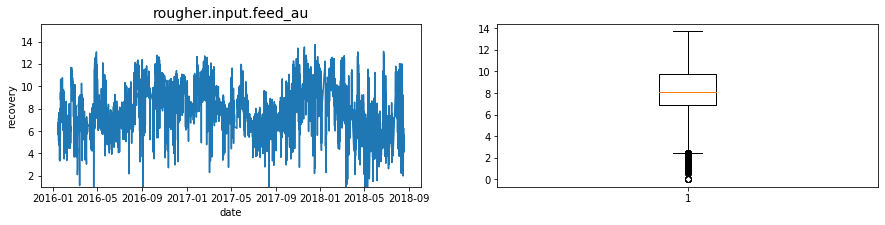

Интервал от 1.0233170659310185 до 15.600983598385097
count    19439.000000
mean         8.266097
std          1.955092
min          0.010000
25%          6.854384
50%          8.125839
75%          9.769917
max         13.731330
Name: rougher.input.feed_au, dtype: float64


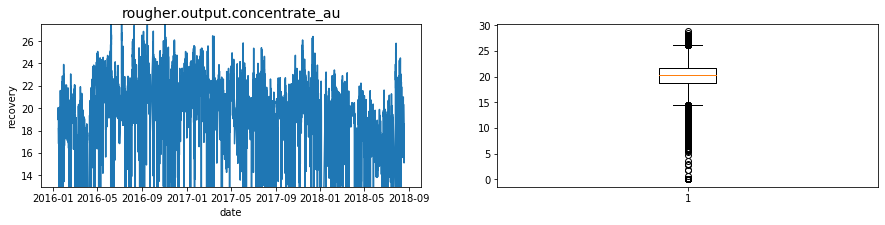

Интервал от 12.971882255518778 до 27.548482942608672
count    19439.000000
mean        19.772000
std          3.753600
min          0.000000
25%         18.802523
50%         20.280214
75%         21.717843
max         28.824507
Name: rougher.output.concentrate_au, dtype: float64


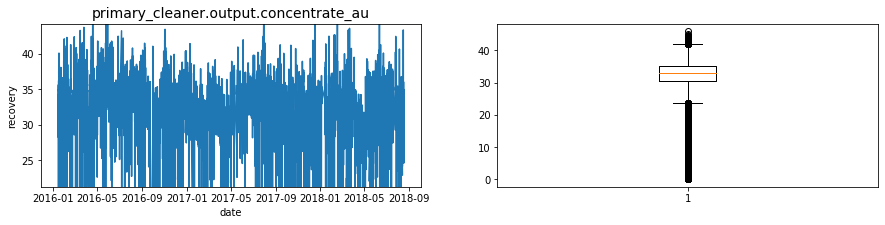

Интервал от 21.2934078048675 до 44.21773750455664
count    19439.000000
mean        32.119400
std          5.627611
min          0.000000
25%         30.463140
50%         32.841295
75%         35.048006
max         45.933934
Name: primary_cleaner.output.concentrate_au, dtype: float64


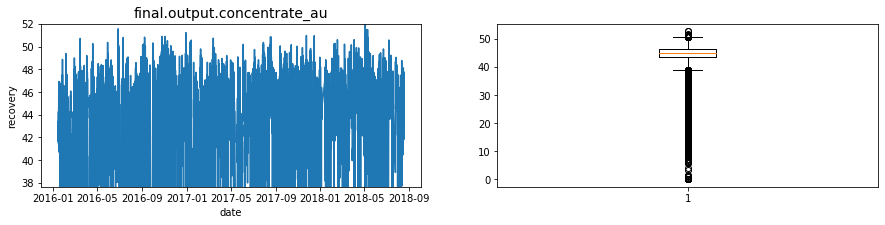

Интервал от 37.656018727477615 до 52.02150879660681
count    19439.000000
mean        44.076513
std          5.129784
min          0.000000
25%         43.402215
50%         45.011244
75%         46.275313
max         52.756638
Name: final.output.concentrate_au, dtype: float64


In [22]:

# сделаем функцию отрисовки пары графиков: recovery и ящик с усами
def ploting(df,name,high,low):
    fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=False)
    fig.set_figheight(3)
    fig.set_figwidth(15)
    ax[0].plot(df[name], label=name)
    ax[0].set_title(name, fontsize=14)
    ax[0].set_xlabel ('date')
    ax[0].set_ylabel ('recovery')
    ax[0].set_ylim(low,high)
    ax[1].boxplot(df[name])
    plt.show()

# Расчитаем интервал графиков от Q1-3*IQR до Q3+3*IQR, чтоб избавить от выбросов
def plotting_intervals(df, column):
    
    first_quantile = df[column].quantile(0.25)
    third_quantile = df[column].quantile(0.75)
    iqr = third_quantile - first_quantile
    
    interval_low = first_quantile - 2 * iqr
    interval_high = third_quantile + 2 * iqr
        
    return(interval_low, interval_high)
    
# Посмотрим графики recovery и ящик с усами без выбросов для Au и описательную статистику с учетом выбросов
names = [
        'rougher.input.feed_au',
        'rougher.output.concentrate_au',
        'primary_cleaner.output.concentrate_au',
        'final.output.concentrate_au'
        ] 

for name in names:
    low, high = plotting_intervals(gold_recovery_full, name)
    ploting(gold_recovery_full, name, high,low)
    print("Интервал от",low,"до", high)
    print(gold_recovery_full[name].describe())




Да, картинка не очень, мало того, что у нас много выбросов, так еще и нулевых значений хватает. Вполне возможно, что измерение не состоялись по тем или иным причинам. Поэтому уберем нулевые значения и выбросы, а затем опять посмотрим на графики.

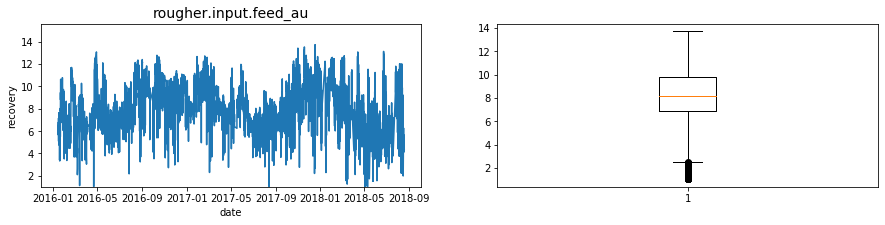

Интервал от 1.0233170659310185 до 15.600983598385097
count    19418.000000
mean         8.274368
std          1.939861
min          1.025235
25%          6.857058
50%          8.129623
75%          9.770475
max         13.731330
Name: rougher.input.feed_au, dtype: float64


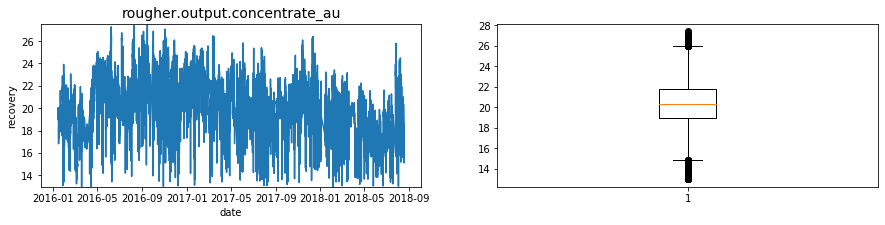

Интервал от 12.971882255518778 до 27.548482942608672
count    18785.000000
mean        20.308302
std          2.168090
min         12.972888
25%         18.996100
50%         20.355406
75%         21.776347
max         27.425796
Name: rougher.output.concentrate_au, dtype: float64


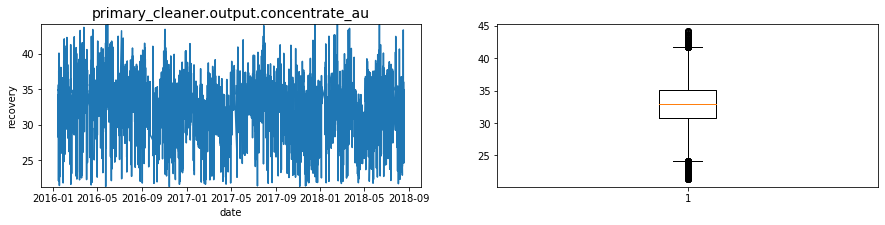

Интервал от 21.2934078048675 до 44.21773750455664
count    18776.000000
mean        32.915524
std          3.393412
min         21.307425
25%         30.736444
50%         32.980172
75%         35.123520
max         44.201701
Name: primary_cleaner.output.concentrate_au, dtype: float64


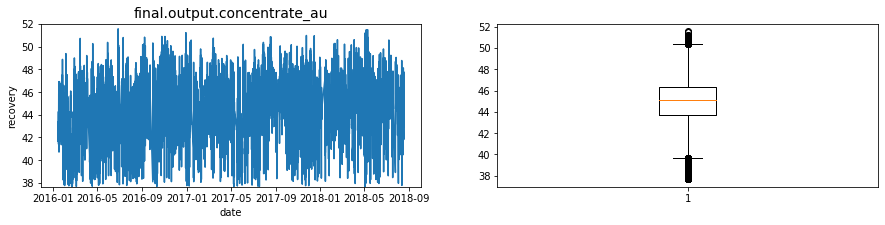

Интервал от 37.656018727477615 до 52.02150879660681
count    18533.000000
mean        44.926671
std          2.197705
min         37.661198
25%         43.687465
50%         45.128119
75%         46.347784
max         51.571885
Name: final.output.concentrate_au, dtype: float64


In [23]:

for name in names:
    low, high = plotting_intervals(gold_recovery_full, name)
    
    zeroless_full = gold_recovery_full[(
                                        gold_recovery_full[name]>=low
                                        )&(
                                        gold_recovery_full[name]<=high
                                        )].copy()
    

    
    ploting(zeroless_full, name, high,low)
    print("Интервал от",low,"до", high)
    print(zeroless_full[name].describe())

Все равно мало информативно. Пока что можем лишь сказать, что с каждым последующим этапом доля содержания золота возрастает, что уже достаточно хорошо, само по себе, потому что означает, что предприятие на верном пути. Теперь нам следует посмотреть гистограммы восстановления на одном поле, но так, чтоб все графики были без выбросов.

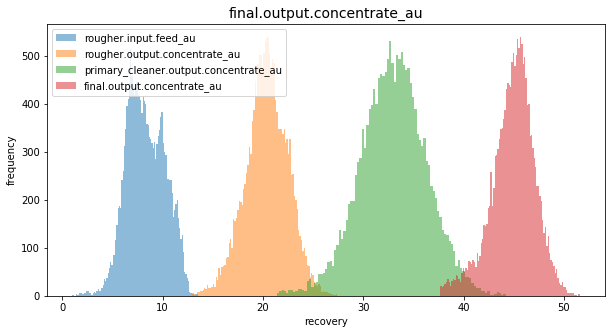

In [24]:


low, high = plotting_intervals(gold_recovery_full, 'rougher.input.feed_au')

zeroless_full = gold_recovery_full[(
                                        gold_recovery_full['rougher.input.feed_au']>=low
                                        )&(
                                        gold_recovery_full['rougher.input.feed_au']<=high
                                        )].copy()


low, high = plotting_intervals(gold_recovery_full, 'rougher.output.concentrate_au')
zeroless_full = zeroless_full[(
                                        zeroless_full['rougher.output.concentrate_au']>=low
                                        )&(
                                        zeroless_full['rougher.output.concentrate_au']<=high
                                        )]


low, high = plotting_intervals(gold_recovery_full, 'primary_cleaner.output.concentrate_au')
zeroless_full = zeroless_full[(
                                        zeroless_full['primary_cleaner.output.concentrate_au']>=low
                                        )&(
                                        zeroless_full['primary_cleaner.output.concentrate_au']<=high


)]
low, high = plotting_intervals(gold_recovery_full, 'final.output.concentrate_au')
zeroless_full = zeroless_full[(
                                        zeroless_full['final.output.concentrate_au']>=low
                                        )&(
                                        zeroless_full['final.output.concentrate_au']<=high
                                        )]

#построим график
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
for name in names:    
    ax.hist(zeroless_full[name], bins=100, label=name, alpha=0.5)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel ('recovery')
    ax.set_ylabel ('frequency')
plt.legend()    
plt.show()



Таким образом, избавившись от выбросов можем точно сказать, что с каждой последующей стадией очиски количество коэффицент содержания золота возрастает, при этом глядя на гистограмму процесса повторной очист можно сказать, что этот процесс наименее предсказуем относительно выходного результата, потому как диапазон концентрации золота может быть как чуть больше 20%, так и больше 40%.

Посмотрим на ситуацию с серебром. Сразу будем действовать аналогичным образом и уберем выбросы.

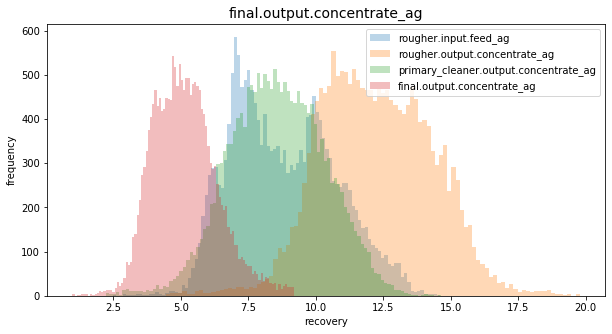

In [25]:
low, high = plotting_intervals(gold_recovery_full, 'rougher.input.feed_ag')

zeroless_full = gold_recovery_full[(
                                        gold_recovery_full['rougher.input.feed_ag']>=low
                                        )&(
                                        gold_recovery_full['rougher.input.feed_ag']<=high
                                        )].copy()


low, high = plotting_intervals(gold_recovery_full, 'rougher.output.concentrate_ag')
zeroless_full = zeroless_full[(
                                        zeroless_full['rougher.output.concentrate_ag']>=low
                                        )&(
                                        zeroless_full['rougher.output.concentrate_ag']<=high
                                        )]


low, high = plotting_intervals(gold_recovery_full, 'primary_cleaner.output.concentrate_ag')
zeroless_full = zeroless_full[(
                                        zeroless_full['primary_cleaner.output.concentrate_ag']>=low
                                        )&(
                                        zeroless_full['primary_cleaner.output.concentrate_ag']<=high


)]
low, high = plotting_intervals(gold_recovery_full, 'final.output.concentrate_ag')
zeroless_full = zeroless_full[(
                                        zeroless_full['final.output.concentrate_ag']>=low
                                        )&(
                                        zeroless_full['final.output.concentrate_ag']<=high
                                        )]

names = [
        'rougher.input.feed_ag',
        'rougher.output.concentrate_ag',
        'primary_cleaner.output.concentrate_ag',
        'final.output.concentrate_ag'
        ] 

#построим график
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
for name in names:    
    ax.hist(zeroless_full[name], bins=100, label=name, alpha=0.3)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel ('recovery')
    ax.set_ylabel ('frequency')
plt.legend()    
plt.show()

В случае с серебром картинка интереснее, так в среднем серебра в смеси золотоносной руды меньше нежели серебра в сырье после флотации, однако после процесса первичной очистки его количество ожидаемо падает и достигает минимума после повторной очиски. Вполне возможно, что при флотации, в качестве какого-то реагента используется именно серебро, либо, вполне возможно, что на предприятии используется метод селиктивной флотации, который одинаково хорошо подходит и для золота и для серебра. Если эта гипотеза верна, то и количество свинца после флотации тоже должно возрастать, по сравнению с количеством свинца в смеси золотоносной руды. Посмотрим на Pb.


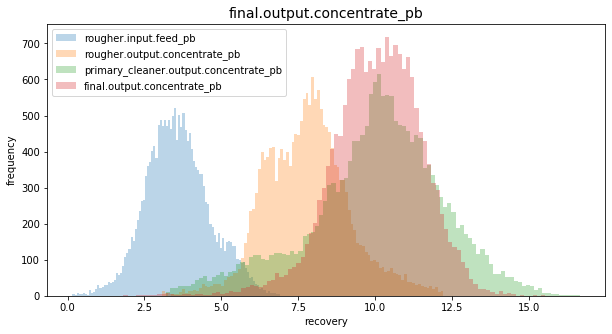

In [26]:
low, high = plotting_intervals(gold_recovery_full, 'rougher.input.feed_pb')

zeroless_full = gold_recovery_full[(
                                        gold_recovery_full['rougher.input.feed_pb']>=low
                                        )&(
                                        gold_recovery_full['rougher.input.feed_pb']<=high
                                        )].copy()


low, high = plotting_intervals(gold_recovery_full, 'rougher.output.concentrate_pb')
zeroless_full = zeroless_full[(
                                        zeroless_full['rougher.output.concentrate_pb']>=low
                                        )&(
                                        zeroless_full['rougher.output.concentrate_pb']<=high
                                        )]


low, high = plotting_intervals(gold_recovery_full, 'primary_cleaner.output.concentrate_pb')
zeroless_full = zeroless_full[(
                                        zeroless_full['primary_cleaner.output.concentrate_pb']>=low
                                        )&(
                                        zeroless_full['primary_cleaner.output.concentrate_pb']<=high


)]
low, high = plotting_intervals(gold_recovery_full, 'final.output.concentrate_ag')
zeroless_full = zeroless_full[(
                                        zeroless_full['final.output.concentrate_ag']>=low
                                        )&(
                                        zeroless_full['final.output.concentrate_ag']<=high
                                        )]

names = [
        'rougher.input.feed_pb',
        'rougher.output.concentrate_pb',
        'primary_cleaner.output.concentrate_pb',
        'final.output.concentrate_pb'
        ] 

#построим график
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
for name in names:    
    ax.hist(zeroless_full[name], bins=100, label=name, alpha=0.3)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel ('recovery')
    ax.set_ylabel ('frequency')
plt.legend()    
plt.show()

Все выглядит так, что гипотеза о использовании метода селективной флотации верна. Количество свинца растет после флотации и даже после первичной и вторичной очисток, при этом после первичной очистки, в некоторы случаях количество свинца может быть даже выше чем после вторичной очистки. Возможно это означает, что сырье с содержанием свинца после первичной очистки свыше определенной нормы может быть передано на другой участок горно-обоготительного комбината, например для извлечения свинца, а не золота. А может быть, при процессе повторной очистки свинец не используется и поэтому его доля в финальном концентрате ниже.

Теперь сравним распределение размера гранул сырья в обучающей и тестовой выборке, для этого посмотрим на графики плотности распределения. Если размер будет сильно отличаться, то качество модели может от этого страдать. 

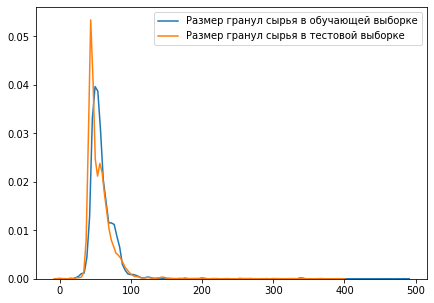

In [27]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.kdeplot(gold_recovery_train['rougher.input.feed_size'], label='Размер гранул сырья в обучающей выборке')
sns.kdeplot(gold_recovery_test['rougher.input.feed_size'], label='Размер гранул сырья в тестовой выборке')
plt.show()

Похоже, что распределения не сильно отличаются, а значит качество модели страдать не должно.

Теперь исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

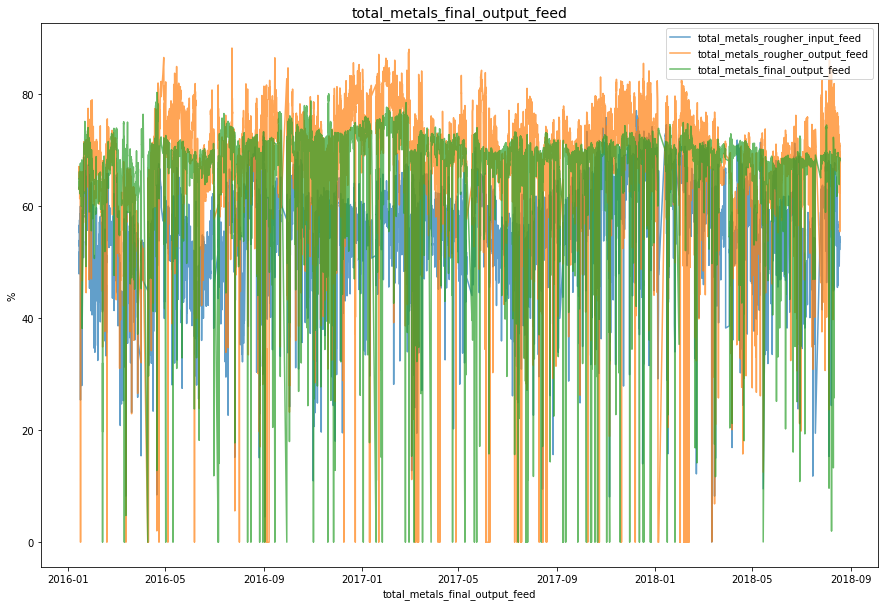

In [28]:
# соберем данные в 3 группы: содержание веществ в сырье, в черновом концентрате (после флотации) и в финальном концентрате

gold_recovery_full['total_metals_rougher_input_feed']=(
                                                gold_recovery_full['rougher.input.feed_ag']+
                                                gold_recovery_full['rougher.input.feed_au']+
                                                gold_recovery_full['rougher.input.feed_pb']+
                                                gold_recovery_full['rougher.input.feed_sol']
                                                )

gold_recovery_full['total_metals_rougher_output_feed']=(
                                                gold_recovery_full['rougher.output.concentrate_ag']+
                                                gold_recovery_full['rougher.output.concentrate_au']+
                                                gold_recovery_full['rougher.output.concentrate_pb']+
                                                gold_recovery_full['rougher.output.concentrate_sol']
                                                )

gold_recovery_full['total_metals_final_output_feed']=(
                                                gold_recovery_full['final.output.concentrate_ag']+
                                                gold_recovery_full['final.output.concentrate_au']+
                                                gold_recovery_full['final.output.concentrate_pb']+
                                                gold_recovery_full['final.output.concentrate_sol']
                                                )
# построим графики 
names=[
    'total_metals_rougher_input_feed',
    'total_metals_rougher_output_feed',
    'total_metals_final_output_feed'
]
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
for name in names:    
    ax.plot(gold_recovery_full[name], label=name, alpha=0.7)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel (name)
    plt.legend() 
    ax.set_ylabel ('%')
    plt.legend()
plt.show()
   



Интересно, у нас есть некоторое количество данных у которых на разных стадиях сумарная концентрация всех веществ равна нулю. Возможно нули связаны со сбоями измирительного оборудования и мы удалим такие данные. Углубляться дальше и удалять нули в концентрациях отдельных веществ на отдельной стадии мы не будем, потому как это уже может быть не аномалия, а свойство руды, что в ней нет искомых элементов. 

Так же мы **не будем** удалять выбросы и брать только те данные которые попадают в интервал от Q1-2*IQR до Q3+2*IQR, потому что это тоже будет вызывать противоречие с самой сущностью руды.

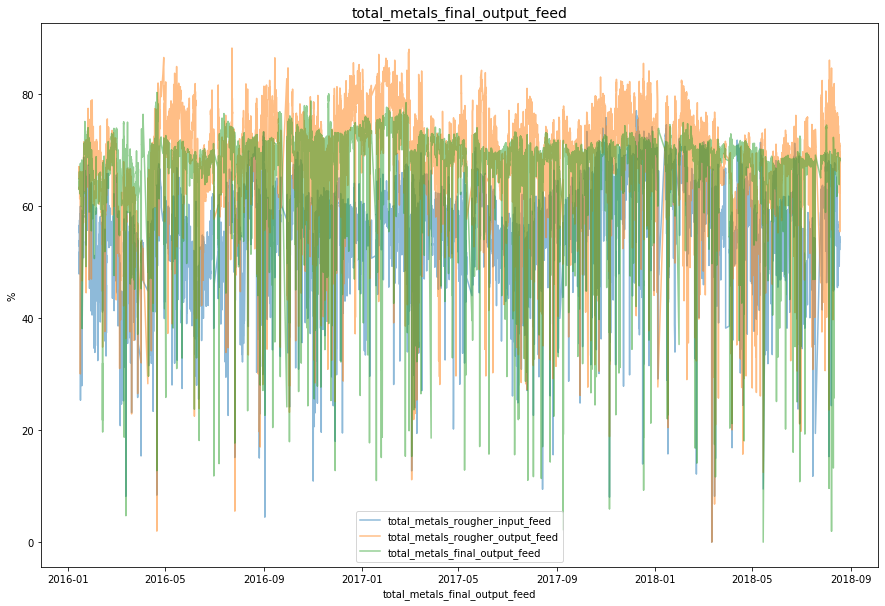

In [29]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
for name in names:
    #low,high=  plotting_intervals(gold_recovery_full, name)
    ax.plot(gold_recovery_full[gold_recovery_full[name] > 0][name], label=name, alpha=0.5)
    ax.set_title(name, fontsize=14)
    ax.set_xlabel (name)
    plt.legend() 
    ax.set_ylabel ('%')
    plt.legend()
plt.show()

Отлично, мы определились, какие именно строки нам следует удалять, а какие нет. Пора удалить эти строки из тренировочной и тестовой выборок


In [30]:
# напишим функцию, которая будет удалять строки
def dell_zeros (df):
    #start= df.shape
    #display(start)

    # создадим временный фрейм, в который положим новые столбцы из общего, но только те строки,
    # которые есть во фрейме, который передали в функцию
    test = gold_recovery_full.loc[df.index][[
                                            'total_metals_rougher_input_feed',
                                            'total_metals_rougher_output_feed',
                                            'total_metals_final_output_feed' 
                                            ]]
    
    
    
    # добавим созданный фрейм к тому, что получила на вход функция
    df=df.merge(test, on='date', how='left')
   
    
    # скопируем в новы фрейм  из того, который поступил в функцию только те строки, для которых "присоседженые" больше нуля
    temp=df[df['total_metals_rougher_input_feed']>0].copy()
    temp=temp[temp['total_metals_rougher_output_feed']>0]
    temp=temp[temp['total_metals_final_output_feed']>0]  
    df=temp.copy()
    
    # и удалим "присоседженые" 
    df=df.drop('total_metals_rougher_input_feed',axis=1)
    df=df.drop('total_metals_rougher_output_feed',axis=1)
    df=df.drop('total_metals_final_output_feed',axis=1)
    
    #finish=df.shape
    #display(finish)
    #print('было строк',start[0])
    #print('стало строк',finish[0])
    #print('удалили строк',start[0]-finish[0])
    
    return df
    
gold_recovery_train = dell_zeros(gold_recovery_train)  
gold_recovery_test = dell_zeros(gold_recovery_test) 

Отлично, удалили "мусорные" данные из тренировочной и тестовой выборки. Но что на счет общей, в ней так и остались три новых столбца. Удалим и их.

In [31]:
gold_recovery_full=gold_recovery_full.drop('total_metals_rougher_input_feed',axis=1)
gold_recovery_full=gold_recovery_full.drop('total_metals_rougher_output_feed',axis=1)
gold_recovery_full=gold_recovery_full.drop('total_metals_final_output_feed',axis=1)

***Выводы***

1) С каждым последующим этапом доля содержания золота возрастает, а это значит, что с технологической точки зрения наше предприятие работает правильно. При этом, на предприятии скорее всего используется метод селиктивной флотации, на что косвенно указывают следующие факты:
    - доля серебра в сырье после процесса флотации возрастает, а затем постепенно падает достигая своих минимальных значений на этапе финального концентрата
    - количество свинца растет после флотации и даже после первичной и вторичной очисток, при этом после первичной очистки, в некоторы случаях количество свинца может быть даже выше чем после вторичной очистки

2) Распределение размера гранул сырья в обучающей и тестовой выборке не сильно отличается, а значит этот показатель не будет искажать модель

3) В исходных данных было достаточное количество данных, при которых суммарная концентрацая всех веществ (au, ag, pb, sol) на разных стадия (rougher.input, rougher.output, final.output) была равна нулю. Возможно в этом виновата природа самой руды, что мало вероятно, но скорее всего это вызвано сбоями измирительного оборудования и такие данные мы удалили из тренировочной и тестовой выборок. Мы не углублялись и не удаляли данные, в которых концентрация какого-либо вещества, на какой-либо стадии, равна нулю, потому что это уже очень вероятно и может являться сущностью руды.

# 3. Модель

Поскольку метрикой нашей модели является sMAPE, то напишим функцию для вычисления этой метрики, а так же для вычисления итогового sMAPE.

In [32]:
def smape(y_true, y_pred):
    
    smape= np.mean(2*np.abs(y_true-y_pred)/(np.abs(y_true)+np.abs(y_pred)))*100
    
    return smape

def final_smape (smape_rougher, smape_final):
    return 0.25*smape_rougher+0.75*smape_final

Поскольку данные уже разбиты на тренировочную и тестовую выборки, то будем обучать модели на тренировочной и валидировать кросвалидаций, а проверять результат лучшей модели будем на тестовой выборке. Поскольку у нас 2 зависимых переменные, то для одного набора независимых переменных будем делать 2 набора таргетных значений. Для rougher.output.recovery и final.output.recovery. Кроме того, не плохо было бы стандартизовать все независимые переменные, для повышение точности модели.

Первой попробуем обучить и валидировать модель линейной регрессии, но сначала подготовить тренировочные данные

In [33]:
# опеределим зависимые и независимые переменные для обучающей выборки
features_train = gold_recovery_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_train_rougher = gold_recovery_train['rougher.output.recovery']
target_train_final = gold_recovery_train['final.output.recovery']

# определим список независимых переменных
numeric = features_train.columns.to_list()

# обучим стандартизации на тренировочных данных
scaler = StandardScaler()
scaler.fit(features_train[numeric])

# чтобы не портить исходную выборку сделаем ее копию
features_train_scaler = features_train.copy() 

# и стандартизируем эту копию, чтоб дальше работать уже с ней
features_train_scaler[numeric] = scaler.transform(features_train[numeric])

А теперь все же перейдем к модели линейной регрессии. Будем обучать ее на тренировочном датасете и проверять кросс-валидацией. Для этого напишем функцию.

In [34]:
def smape(y_true, y_pred):
    
    smape= np.mean(2*np.abs(y_true-y_pred)/(np.abs(y_true)+np.abs(y_pred)))*100
    
    return smape

def cross_validation(model, features_train_scaler, target_train):
    # создадим из функции расчета smape метрику
    smape_score = make_scorer(smape, greater_is_better=False)


    # вызовем функцию кросс-валидации с нашей новой метрикой и узнаем насколько хороша модель
    smape_score = cross_val_score(model, features_train_scaler, target_train, cv=5, scoring=smape_score)
    
    return smape_score



# создадим модель
model=LinearRegression()

# обучим модель для rougher
model.fit(features_train_scaler, target_train_rougher)

# расчитаем smape для rougher
smape_score_linear_rougher= cross_validation(model, features_train_scaler, target_train_rougher)


# обучим модель final
model.fit(features_train_scaler, target_train_final)

# расчитаем smape для final
smape_score_linear_final = cross_validation(model, features_train_scaler, target_train_final)

print("sMAPE линейной модели для rougher:{: .5f}".format(smape_score_linear_rougher.mean()))
print("sMAPE линейной модели для final:{: .5f}".format(smape_score_linear_final.mean()))
print("Итоговое sMAPE линейной модели:{: .5f}".format(
                                                    final_smape(
                                                                smape_score_linear_rougher.mean(),
                                                                smape_score_linear_final.mean()
                                                                )
                                                    ))



sMAPE линейной модели для rougher:-7.26781
sMAPE линейной модели для final:-10.99020
Итоговое sMAPE линейной модели:-10.05960




 Симметричное среднее абсолютное процентное отклонение для концентрата после процесса флотации чуть больше 7%, а для финального концентрата почти 11%. Общее симметричное отклонение составляет чуть больше 10%. Посмотрим другие модели, например дерева решений

In [35]:
model=DecisionTreeRegressor(random_state=12345)

# обучим модель для rougher
model.fit(features_train_scaler, target_train_rougher)

# расчитаем smape для rougher
smape_score_tree_rougher= cross_validation(model, features_train_scaler, target_train_rougher)

# обучим модель для final
model.fit(features_train_scaler, target_train_final)

# расчитаем smape для final
smape_score_tree_final = cross_validation(model, features_train_scaler, target_train_final)

print("sMAPE модели дерева для rougher:{: .5f}".format(smape_score_tree_rougher.mean()))
print("sMAPE модели дерева для final:{: .5f}".format(smape_score_tree_final.mean()))
print("Итоговое sMAPE модели дерева:{: .5f}".format(
                                                    final_smape(
                                                                smape_score_tree_rougher.mean(),
                                                                smape_score_tree_final.mean()
                                                                )
                                                    ))



sMAPE модели дерева для rougher:-9.32262
sMAPE модели дерева для final:-16.30055
Итоговое sMAPE модели дерева:-14.55607


Мда, модели дерева решений показатели хуже, пока линейная регрессия побеждает. Посмотрим модель случайного леса с различными параметрами.

In [36]:


# определим словарь тех параметров, которые будем перебирать
param_grid = { 
    'n_estimators': range(1,10),
    'max_depth' : range(1,10), 
}

# объявим модель, для которой будем перебирать
model=RandomForestRegressor(random_state=12345)

# объявим модель Гридсерч, в которой будем перебирать параметры модели и делать кросс-валидацию 
# в качестве метрики будем использовать smape
# поскольку он объявлялся метрикой внутри функции кросс-валидации, а тут кросс-валидация зашита в гридсерч, то
# еще раз объявим smape метриков
gs = GridSearchCV(
                 estimator=model, 
                  param_grid=param_grid, 
                  cv=5, 
                  scoring = make_scorer(smape, greater_is_better=False)
                 )

# обучим гридсерч для rougher
gs.fit(features_train_scaler, target_train_rougher)

# выведем параметры лучшей модели случайного леса для rougher
gs_best_estimator_rougher = gs.best_estimator_
print ("Лучшие параметры случайного леса для rougher: ",gs_best_estimator_rougher)

# выведем smape лучшего случайного леса для rougher
smape_score_forest_rougher = gs.best_score_
print ("sMAPE лучшей модели случайного леса для rougher:{: .5f}".format(smape_score_forest_rougher))


# обучим гридсерч для final
gs.fit(features_train_scaler, target_train_final)

# выведем параметры лучшей модели случайного леса для rougher
gs_best_estimator_final = gs.best_estimator_
print ("Лучшие параметры случайного леса для rougher: ",gs_best_estimator_final)

# выведем smape лучшего случайного леса для rougher
smape_score_forest_final = gs.best_score_
print ("sMAPE лучшей модели случайного леса для final:{: .5f}".format(smape_score_forest_final))




Лучшие параметры случайного леса для rougher:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=None,
                      oob_score=False, random_state=12345, verbose=0,
                      warm_start=False)
sMAPE лучшей модели случайного леса для rougher:-6.65224
Лучшие параметры случайного леса для rougher:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
                      oob_score=False, 

In [37]:
print ("Итоговое sMAPE лучшей модели случайного леса:{: .5f}".format(
                                                    final_smape(
                                                                smape_score_forest_rougher.mean(),
                                                                smape_score_forest_final.mean()
                                                                )
                                                    ))

Итоговое sMAPE лучшей модели случайного леса:-8.61225



Таким образом, на модели случайного дерева мы получили лучший результат для предсказания rougher.output.recovery и final.output.recovery. Параметры лучших моделей нам известны. Проверим качество модели на тестовой выборке.

In [38]:
# опеределим зависимые и независимые переменные для обучающей выборки
features_test = gold_recovery_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test_rougher = gold_recovery_test['rougher.output.recovery']
target_test_final = gold_recovery_test['final.output.recovery']

# определим список независимых переменных
numeric = features_test.columns.to_list()

# обучим стандартизации на тренировочных данных
scaler = StandardScaler()
scaler.fit(features_test[numeric])

# чтобы не портить исходную выборку сделаем ее копию
features_test_scaler = features_test.copy() 

# и стандартизируем эту копию, чтоб дальше работать уже с ней
features_test_scaler[numeric] = scaler.transform(features_test[numeric])



# объявим модель для rougher.output.recovery
model_rougher = gs_best_estimator_rougher

# расчитаем smape для rougher
smape_score_best_rougher= cross_validation(model_rougher, features_test_scaler, target_test_rougher)

# объявим модель для final.output.recovery
model_final = gs_best_estimator_final

# расчитаем smape для final
smape_score_best_final = cross_validation(model_final, features_test_scaler, target_test_final)

print("sMAPE лучшей модели для rougher:{: .5f}".format(smape_score_best_rougher.mean()))
print("sMAPE лучшей модели для final:{: .5f}".format(smape_score_best_final.mean()))
print("Итоговое sMAPE пары моделей:{: .5f}".format(
                                                    final_smape(
                                                                smape_score_best_rougher.mean(),
                                                                smape_score_best_final.mean()
                                                                )
                                                    ))

sMAPE лучшей модели для rougher:-4.52302
sMAPE лучшей модели для final:-7.92924
Итоговое sMAPE пары моделей:-7.07769


In [39]:
# опеределим зависимые и независимые переменные для обучающей выборки
features_test = gold_recovery_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test_rougher = gold_recovery_test['rougher.output.recovery']
target_test_final = gold_recovery_test['final.output.recovery']

# определим список независимых переменных
numeric = features_test.columns.to_list()

# обучим стандартизации на тренировочных данных
scaler = StandardScaler()
scaler.fit(features_test[numeric])

# чтобы не портить исходную выборку сделаем ее копию
features_test_scaler = features_test.copy() 

# и стандартизируем эту копию, чтоб дальше работать уже с ней
features_test_scaler[numeric] = scaler.transform(features_test[numeric])



# объявим модель для rougher.output.recovery
model_rougher = gs_best_estimator_rougher

# обучим модель на тренировочных данных
model_rougher.fit(features_train_scaler, target_train_rougher)

# расчитаем smape для rougher
smape_score_best_rougher= smape(target_test_rougher, model_rougher.predict(features_test_scaler))

# объявим модель для final.output.recovery
model_final = gs_best_estimator_final

model_final.fit(features_train_scaler, target_train_final)

# расчитаем smape для final
smape_score_best_final =  smape(target_test_final, model_rougher.predict(features_test_scaler))

print("sMAPE лучшей модели для rougher:{: .5f}".format(smape_score_best_rougher))
print("sMAPE лучшей модели для final:{: .5f}".format(smape_score_best_final))
print("Итоговое sMAPE пары моделей:{: .5f}".format(
                                                    final_smape(
                                                                smape_score_best_rougher,
                                                                smape_score_best_final
                                                                )
                                                    ))

sMAPE лучшей модели для rougher: 5.51371
sMAPE лучшей модели для final: 20.96304
Итоговое sMAPE пары моделей: 17.10071


<font color='blue'>
Теперь посмотрим на адекватность полученной нами модели (на самом деле группы из двух моделей). Для этого сравним результаты с константной моделью. 
</font>


<font color='blue'>
   Константная модель представляет из себя вектор длинны вектора зависимых переменных тестовой выборки (в нашем случае 2 зависимых переменных, значит и вектора будет два), каждый элемент которого является средним или медианой (об этом чуть позже) вектора зависимых переменных выборки на которой обучаем модель. Выбор между тем, какими элементами заполнять вектор средним или медианой определяется тем, какую метрику мы используем для оценки: если мы оцениваем MSE потерь лучше брать среднее, а для MAE потерь лучше брать медиану. В нашем случае sMAPE - это по сути нормированный MAE, так что медиана должна сработать лучше среднего.
</font>
<font color='blue'>
    Таким образом, каждая константная модель будет представлять из себя вектор длины target_test_rougher или target_test_final заполненный медианными значениями target_train_rougher или target_train_final соответственно. А сравнивать мы будем итоговый sMAPE. Если итоговы sMAPE константной модели (группы из 2х моделей) больше аналогичного показателя полученной нами модели (группы из 2х моделей), то наша модель-адекватна.
</font>


In [40]:

# создадим series с константным прдсказанием для rougher.output.recovery на тестовых данных
target_rougher_median =  target_test_rougher.copy()
target_rougher_median.loc[:] = target_train_rougher.median()

# создадим series с константным прдсказанием для final.output.recovery на тестовых данных
target_final_median =  target_test_final.copy()
target_final_median.loc[:] = target_train_final.median()


# посчитаем sMAPE для rougher.output.recovery на константном предсказании
smape_rougher_sanity_check_median = smape(target_test_rougher, target_rougher_median)

print("sMAPE rougher median:",smape_rougher_sanity_check_median)

# посчитаем sMAPE для final.output.recovery на константном предсказании
smape_final_sanity_check_median = smape(target_test_final, target_final_median)

print("sMAPE final median:",smape_final_sanity_check_median)

print("Итоговое sMAPE двух констанстных модели:{: .5f}".format(
                                                    final_smape(
                                                                smape_rougher_sanity_check_median,
                                                                smape_final_sanity_check_median
                                                                )
                                                    ))




sMAPE rougher median: 4.8208788351024054
sMAPE final median: 8.21125461949186
Итоговое sMAPE двух констанстных модели: 7.36366


<font color='blue'>
Итоговый показатель sMAPE нашей молели (группы из 2х моделей) лучше аналогичного показателя констанстной модели, а значит наша модель адекватна. Лучше он в силу того, что помимо того, что мы должны минимизировать sMAPE, мы еще и должны приближать его к нулю (т.е сравнивать по модулю, где чем меньше, тем лучше), а sMAPE 0 означает, что среднее обсолютное симметричное отклонение модели равно нулю, т.е. модель совсем не дает погрешности. У нас же получилось, что выбранная нами группа моделей дает среднее абсолютное симметричное отклонениие в 7.07%, в то время как констанстная модель - в 7.36%. 

**Общий вывод**

Таким образом, если мы хотим получить максимально точные предсказания коэффициента восстановления золота из золотосодержащей руды, то нам сделует использовать разные модели для предсказания коэффициента восстановления золота из смеси золотоносной руды до чернового концентрата и для восстановления золота из концентрата поступающего на вторичную очистку до финального концентрата. На первом этапе нам следует использовать модель случайного леса, потому как именна она дает минимальное абсолютное процентное отклонение, а на втором - модель линейной регрессии. При такой связке, на тестовой выборке получили абсолютное процентное отклонение (итоговое) равное 9.92754%